In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, f1_score, make_scorer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit, RandomizedSearchCV
from xgboost import XGBClassifier




In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#data.drop(columns=['customerID'], inplace=True)
data['Churn'][data['Churn'] == 'Yes'] = 1
data['Churn'][data['Churn'] == 'No'] = 0
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')

C:\Users\mprev\AppData\Local\Temp\ipykernel_17108\2240443310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Churn'][data['Churn'] == 'Yes'] = 1
C:\Users\mprev\AppData\Local\Temp\ipykernel_17108\2240443310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Churn'][data['Churn'] == 'No'] = 0


In [6]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
data.dropna(inplace=True)

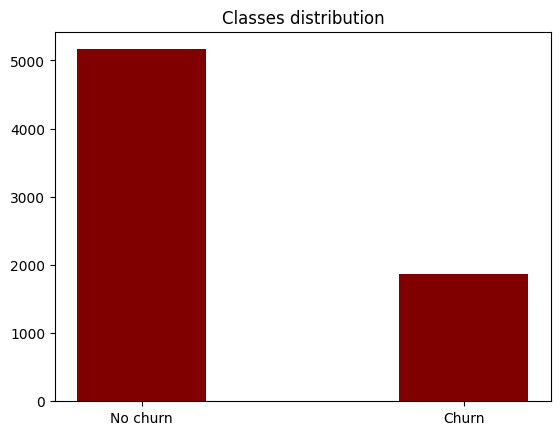

In [8]:
def data_distribution(data):
    categories = ["No churn", "Churn"]
    values     = [ np.sum(data['Churn'] == 0), np.sum(data['Churn'] == 1)]

    plt.title('Classes distribution')
    plt.bar(categories, values, color ='maroon', 
            width = 0.4)

    plt.show()

data_distribution(data)

In [10]:
# Analise exploratória
#       ver nans no dataset
#       ver distribuição das features no dataset
#       tentar ver feature importance no dataset

In [9]:
# Exploratory functions

# Distribution
def hist(df):
  """
      Função que plota um historia de cada numerical feature
  """
  for column in df.columns:
    plt.hist(df[column], bins=len(df[column].unique()), edgecolor='black')  # bins specifies the number of bins in the histogram
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram using Matplotlib')
    plt.show()
    
# Feature importance
#      categorical features
def create_pie_charts(dataframe, categorical_column, binary_column):
    """
        Função que plota um grafico de pizza para cada categoria de uma coluna, no qual cada grafico mostra quantos se converteram em classe positiva ou negavita (y/bunary_column)
    """
    # para cada categoria
    unique_categories = dataframe[categorical_column].unique()

    for category in unique_categories:
        subset = dataframe[dataframe[categorical_column] == category]
        counts = subset[binary_column].value_counts()
        class_count = dataframe[categorical_column].value_counts()[category]

        labels = [0, 1]
        # Dictionary mapping classes to colors
        class_colors = {0: 'red', 1: 'green'}

        # Create a list of colors based on the class_colors dictionary
        colors = [class_colors[label] for label in labels]

        plt.figure(figsize=(6, 6))
        plt.pie(counts, labels=counts.index,colors=colors ,autopct='%1.1f%%', startangle=140)
        plt.title(f'Pie Chart for {categorical_column}="{category}"' + ' number =' + str(class_count))
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()

def pearson_r(df, y_column):
    corr_matrix = df.corr()
    corr_matrix[y_column].sort_values(ascending=False)

def replace_yes_no(df, column):
    df2 = df.copy()
    df2[column][df2[column] == 'Yes'] = 1
    df2[column][df2[column] == 'No'] = 0
    return df2
        

In [10]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f'\n----------------- {column} -----------------')
    print('Values: ', unique_values)


----------------- customerID -----------------
Values:  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

----------------- gender -----------------
Values:  ['Female' 'Male']

----------------- SeniorCitizen -----------------
Values:  [0 1]

----------------- Partner -----------------
Values:  ['Yes' 'No']

----------------- Dependents -----------------
Values:  ['No' 'Yes']

----------------- tenure -----------------
Values:  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]

----------------- PhoneService -----------------
Values:  ['No' 'Yes']

----------------- MultipleLines -----------------
Values:  ['No phone service' 'No' 'Yes']

----------------- InternetService -----------------
Values:  ['DSL' 'Fiber optic' 'No']

----------------- OnlineSecurity -----------------
Values

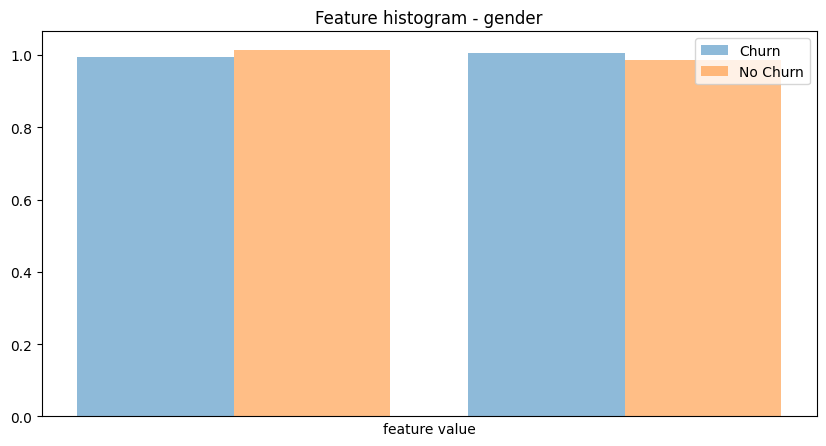

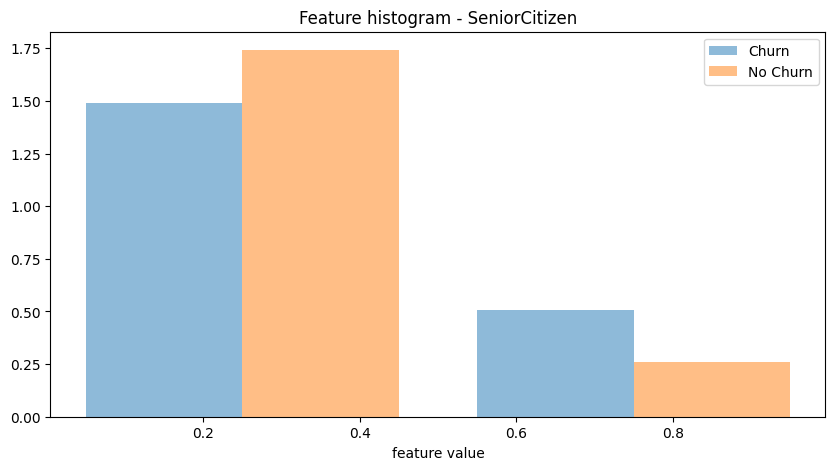

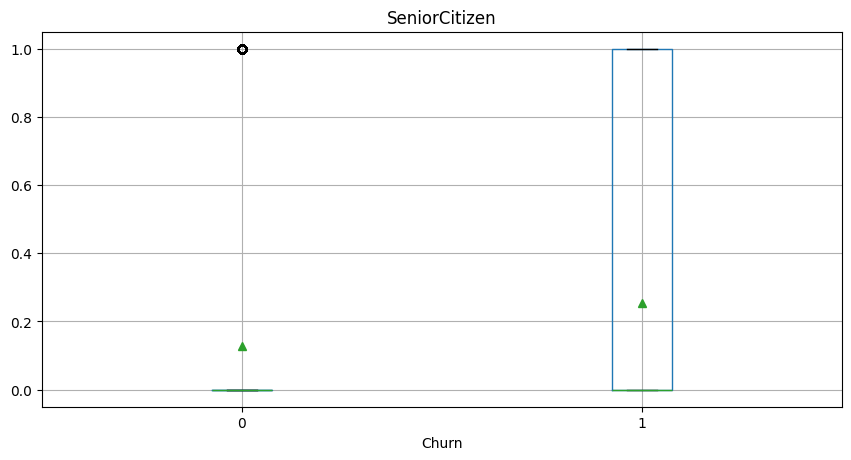

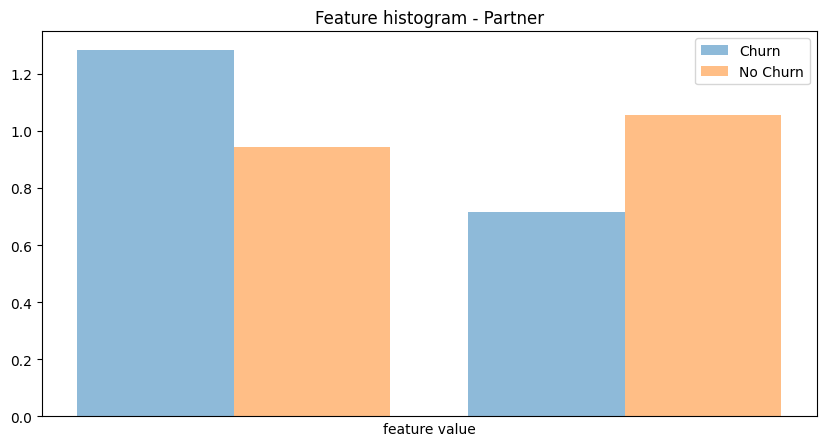

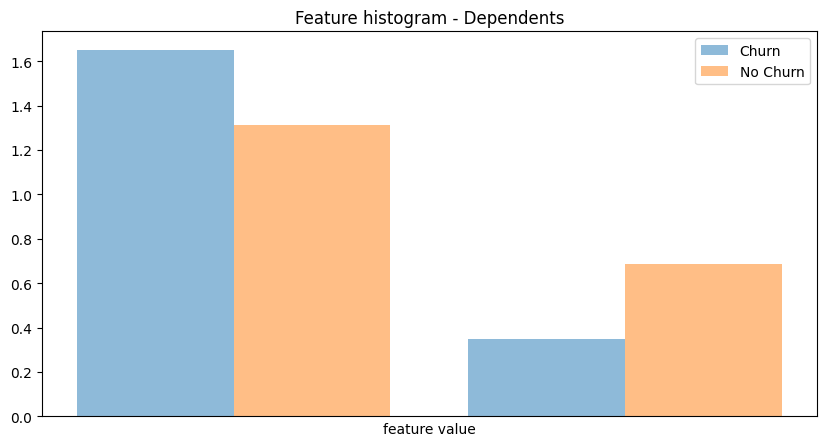

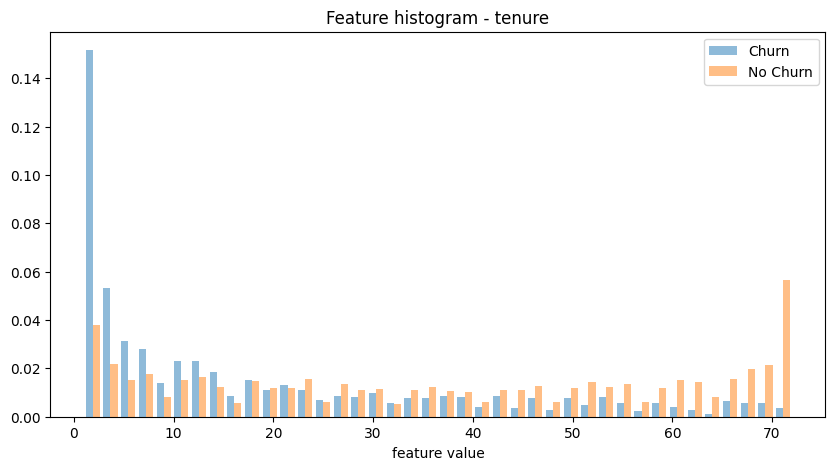

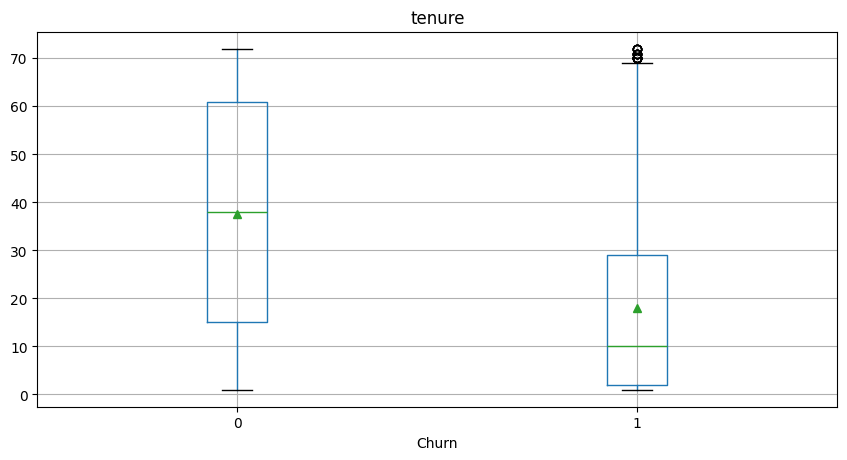

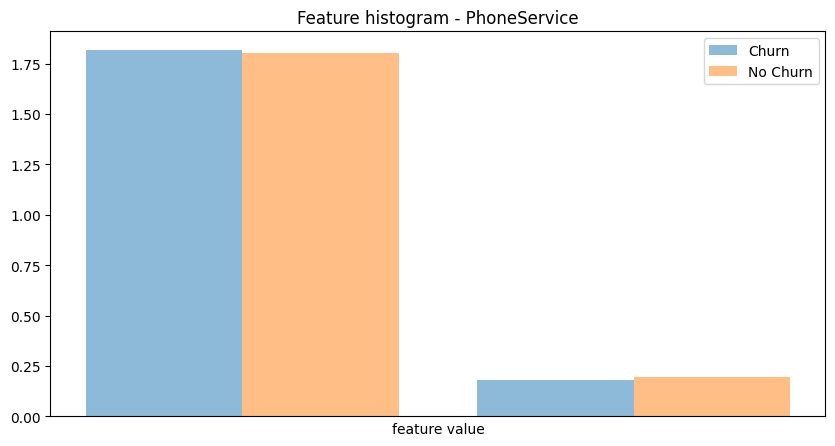

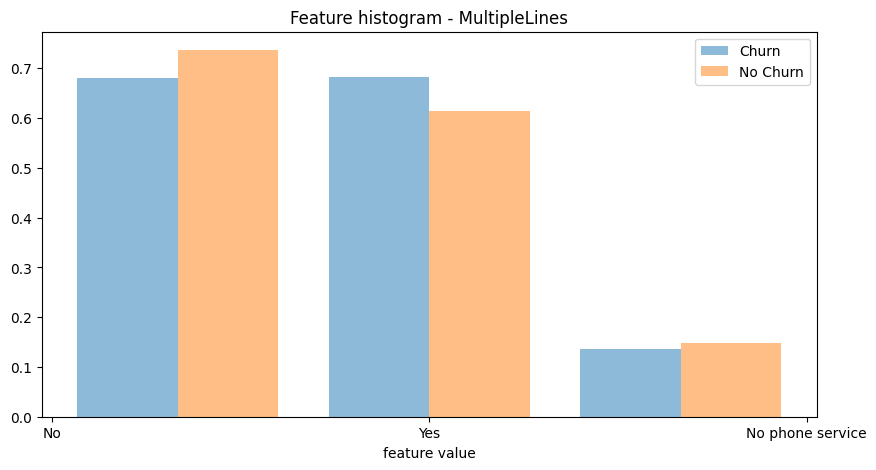

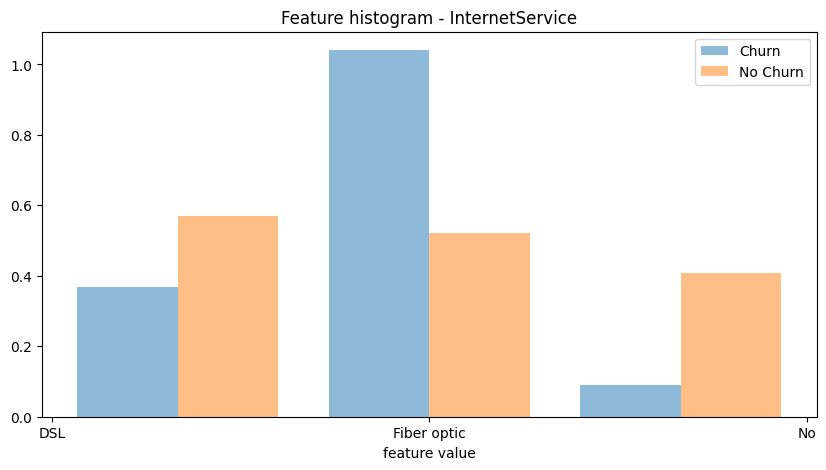

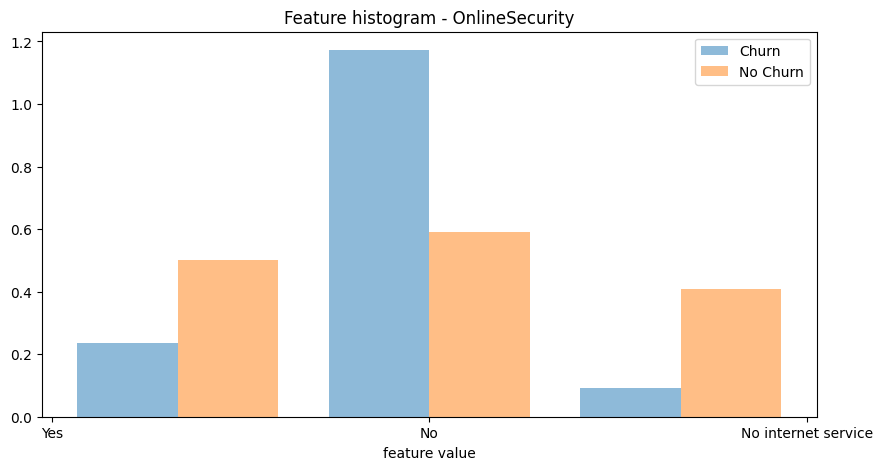

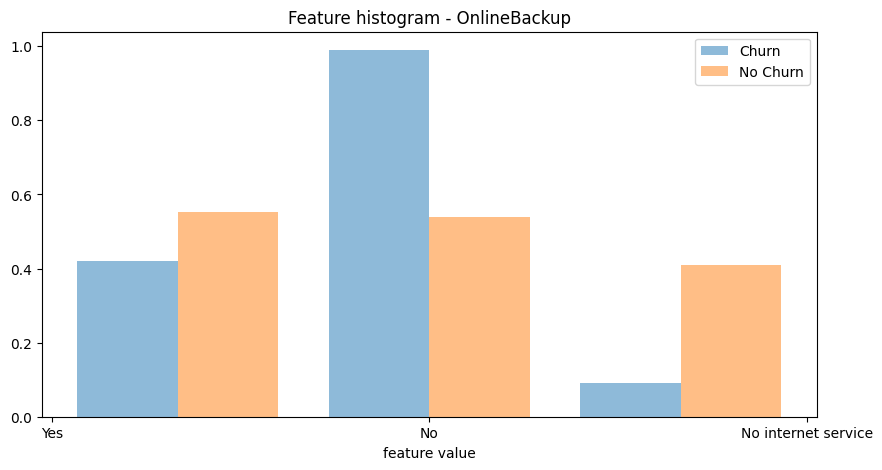

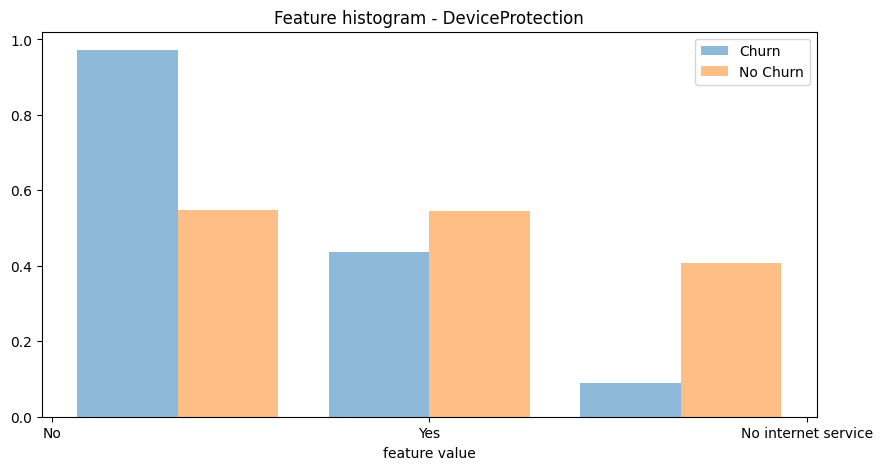

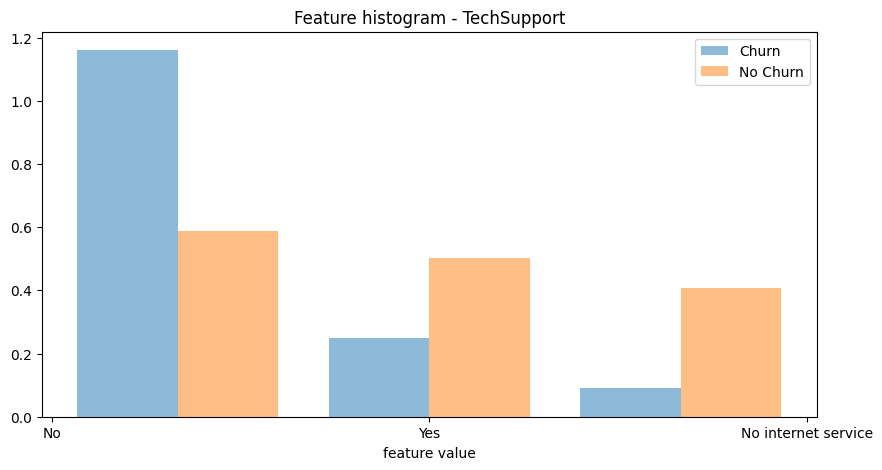

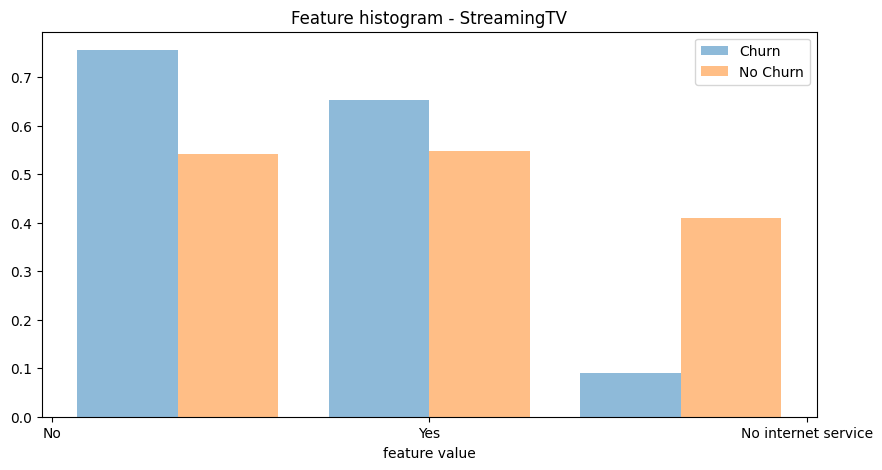

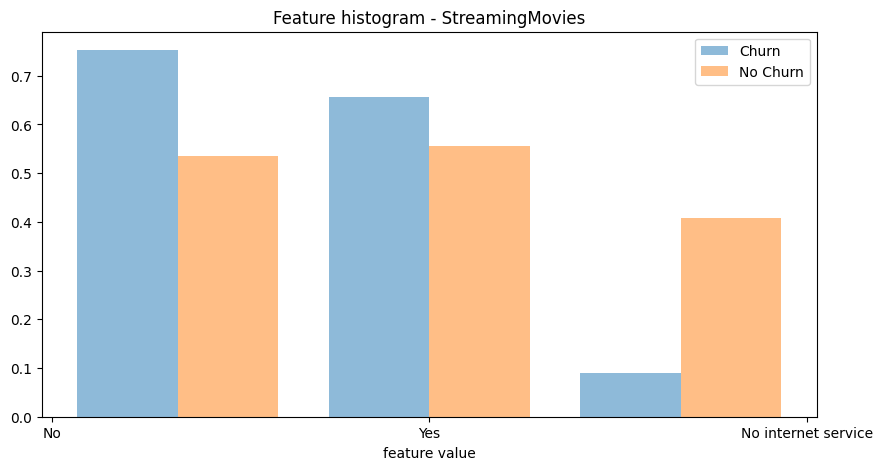

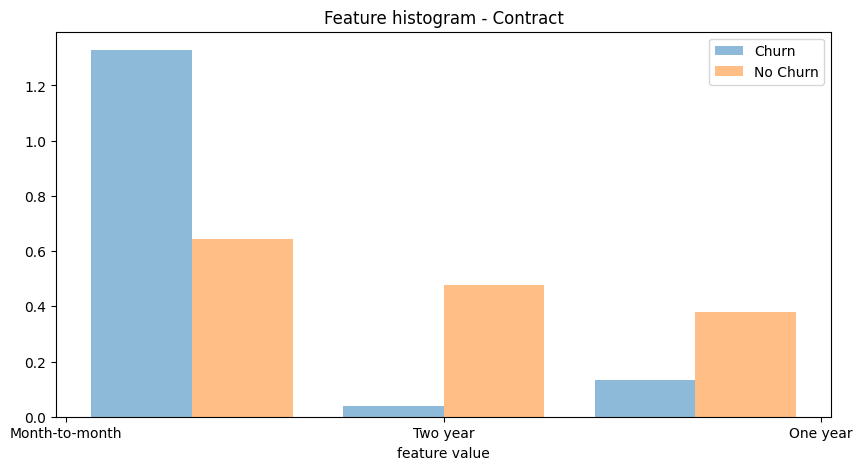

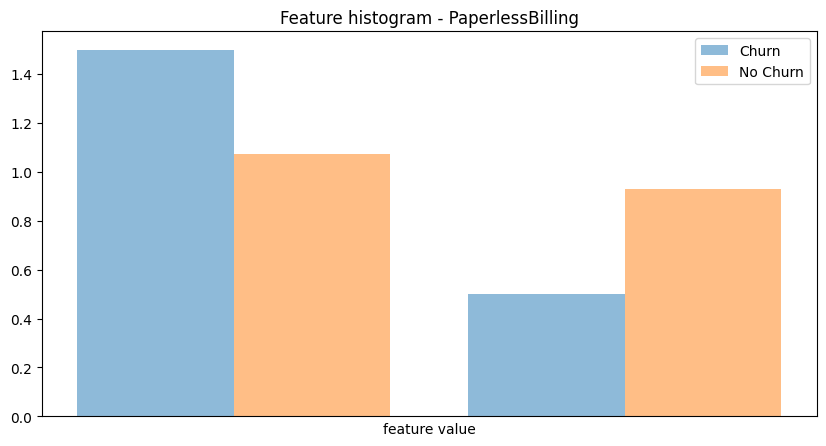

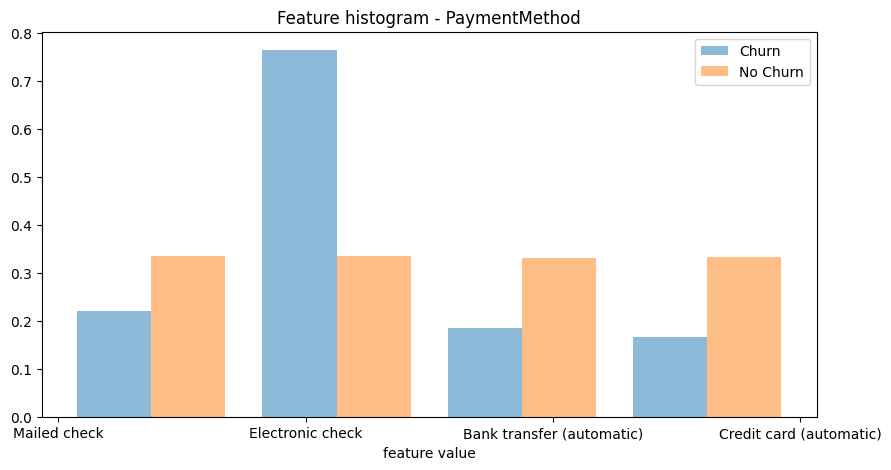

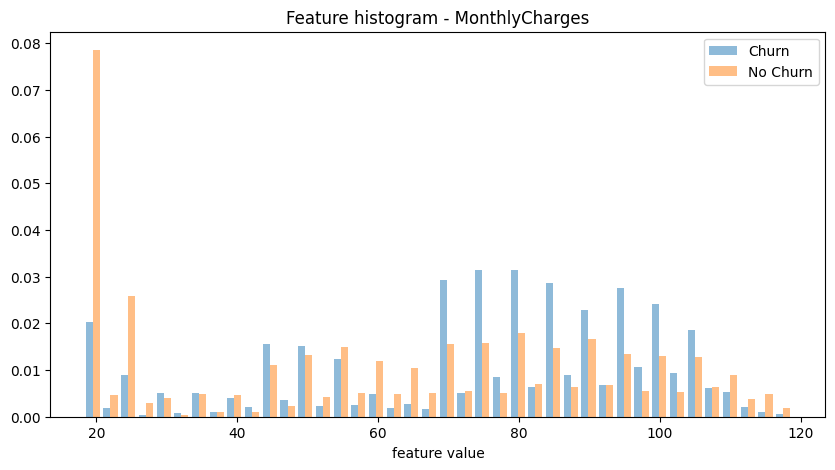

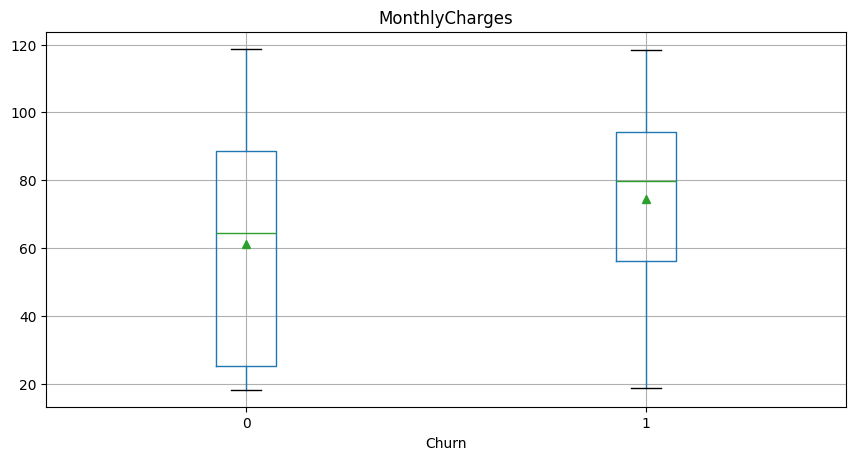

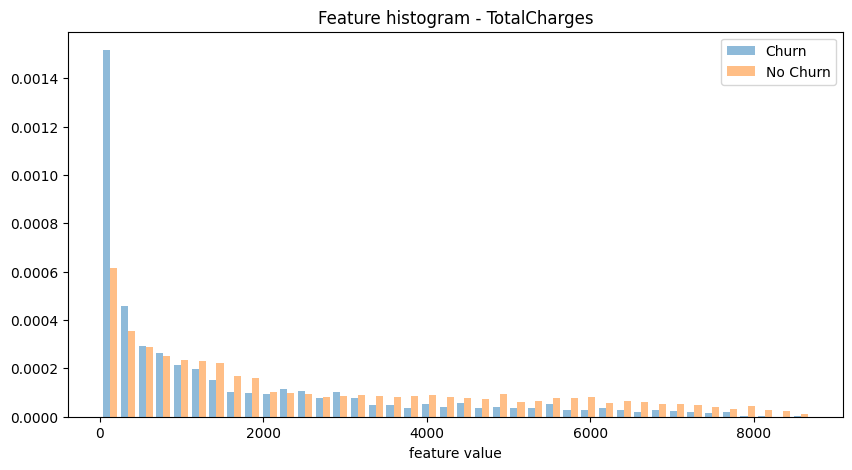

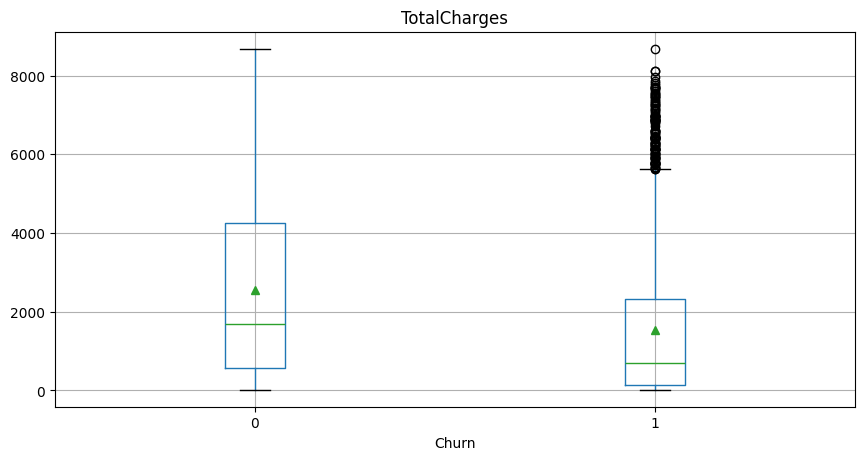

In [12]:

def plot_feature_evaluation(df, f_name, bins, categorical):
    churn = df[(df['Churn'] == 1)][f_name]
    no_chunr = df[(df['Churn'] == 0)][f_name]
    
    fig, ax0 = plt.subplots(nrows=1, figsize=(10, 5))
    
    ax0.hist([churn ,no_chunr], bins=bins, alpha=0.5, density=True, label=["Churn", "No Churn"])
    ax0.set_title('Feature histogram - {}'.format(f_name))
    ax0.set_xlabel('feature value')
    plt.legend()

    if not categorical:
        df.boxplot(column=[f_name], by='Churn',return_type='axes', showmeans=True, figsize=(10,5))
        plt.title( f_name )
        plt.suptitle('')
        plt.show()
    

plot_feature_evaluation(data, 'gender', 2, True)
plot_feature_evaluation(data, 'SeniorCitizen', 2, False)
plot_feature_evaluation(data, 'Partner', 2, True)
plot_feature_evaluation(data, 'Dependents', 2, True)
plot_feature_evaluation(data, 'tenure', 40, False)
plot_feature_evaluation(data, 'PhoneService', 2, True)
plot_feature_evaluation(data, 'MultipleLines', 3, True)
plot_feature_evaluation(data, 'InternetService', 3, True)
plot_feature_evaluation(data, 'OnlineSecurity', 3, True)
plot_feature_evaluation(data, 'OnlineBackup', 3, True)
plot_feature_evaluation(data, 'DeviceProtection', 3, True)
plot_feature_evaluation(data, 'TechSupport', 3, True)
plot_feature_evaluation(data, 'StreamingTV', 3, True)
plot_feature_evaluation(data, 'StreamingMovies', 3, True)
plot_feature_evaluation(data, 'Contract', 3, True)
plot_feature_evaluation(data, 'PaperlessBilling', 2, True)
plot_feature_evaluation(data, 'PaymentMethod', 4, True)
plot_feature_evaluation(data, 'MonthlyCharges', 40, False)
plot_feature_evaluation(data, 'TotalCharges', 40, False)


In [13]:
# Categorical feature funtions
def parse_one_hot(df, old_column):
    new_df = df.copy()
    new_columns = new_df[old_column].unique()
    if len(new_columns) > 2: 
        for column in new_columns:
            new_df[column] = 0
            new_df[column][new_df[old_column] == column] = 1
    if len(new_columns) == 2:
        new_df[new_columns[0]] = 0
        new_df[new_columns[0]][new_df[old_column] == new_columns[0]] = 1
    new_df.drop(columns=[old_column], inplace=True)
    return new_df

In [14]:
# Categorical features:

# replace yes, no
yes_columns = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport' ,'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn', 'OnlineSecurity', 'OnlineBackup']
for column in yes_columns:
    data[column][data[column]=='No'] = 0
    data[column][data[column]=='No internet service'] = -1
    data[column][data[column]=='Yes'] = 1

# replace gender
data['gender'][data['gender']=='Female'] = 0
data['gender'][data['gender']=='Male'] = 1

# cat enconder
data['MultipleLines'][data['MultipleLines']=='No'] = 0
data['MultipleLines'][data['MultipleLines']=='No phone service'] = 1
data['MultipleLines'][data['MultipleLines']=='Yes'] = 2

data['Contract'][data['Contract']=='Month-to-month'] = 1
data['Contract'][data['Contract']=='One year'] = 12
data['Contract'][data['Contract']=='Two year'] = 24

# one hot-enconder
data = parse_one_hot(data, 'PaymentMethod')
data = parse_one_hot(data, 'InternetService')

data

C:\Users\mprev\AppData\Local\Temp\ipykernel_17108\3330404047.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][data[column]=='No'] = 0
C:\Users\mprev\AppData\Local\Temp\ipykernel_17108\3330404047.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][data[column]=='No internet service'] = -1
C:\Users\mprev\AppData\Local\Temp\ipykernel_17108\3330404047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic),DSL,Fiber optic,No
0,7590-VHVEG,0,0,1,0,1,0,1,0,1,...,29.85,29.85,0,1,0,0,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,56.95,1889.50,0,0,1,0,0,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,53.85,108.15,1,0,1,0,0,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,1,1,0,...,42.30,1840.75,0,0,0,1,0,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,1,0,...,84.80,1990.50,0,0,1,0,0,1,0,0
7039,2234-XADUH,0,0,1,1,72,1,2,0,1,...,103.20,7362.90,0,0,0,0,1,0,1,0
7040,4801-JZAZL,0,0,1,1,11,0,1,1,0,...,29.60,346.45,0,1,0,0,0,1,0,0
7041,8361-LTMKD,1,1,1,0,4,1,2,0,0,...,74.40,306.60,1,0,1,0,0,0,1,0


In [17]:
# numerical features
def standarize(df, numerical_features):
    scaler = StandardScaler()
    df_copy = df.copy()
    df_copy[numerical_features] = scaler.fit_transform(df_copy[numerical_features])
    return df_copy
    

In [18]:
data = standarize(data, ['MonthlyCharges','TotalCharges', 'tenure'])
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic),DSL,Fiber optic,No
0,7590-VHVEG,0,0,1,0,-1.280248,0,1,0,1,...,-1.161694,-0.994194,0,1,0,0,0,1,0,0
1,5575-GNVDE,1,0,0,0,0.064303,1,0,1,0,...,-0.260878,-0.173740,0,0,1,0,0,1,0,0
2,3668-QPYBK,1,0,0,0,-1.239504,1,0,1,1,...,-0.363923,-0.959649,1,0,1,0,0,1,0,0
3,7795-CFOCW,1,0,0,0,0.512486,0,1,1,0,...,-0.747850,-0.195248,0,0,0,1,0,1,0,0
4,9237-HQITU,0,0,0,0,-1.239504,1,0,0,0,...,0.196178,-0.940457,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,-0.343137,1,2,1,0,...,0.664868,-0.129180,0,0,1,0,0,1,0,0
7039,2234-XADUH,0,0,1,1,1.612573,1,2,0,1,...,1.276493,2.241056,0,0,0,0,1,0,1,0
7040,4801-JZAZL,0,0,1,1,-0.872808,0,1,1,0,...,-1.170004,-0.854514,0,1,0,0,0,1,0,0
7041,8361-LTMKD,1,1,1,0,-1.158016,1,2,0,0,...,0.319168,-0.872095,1,0,1,0,0,0,1,0


In [19]:
# remove useless column
data.drop(columns=['customerID'],inplace=True)

In [20]:
# stratify train test
train, test = train_test_split(data, test_size=0.2, stratify=data['Churn'], random_state=42)

full_train = train.copy()
y_train = train['Churn']
train.drop(columns=['Churn'], inplace = True)

full_test = test.copy()
y_test = test['Churn']
test.drop(columns=['Churn'], inplace = True)

In [21]:
def gridSearch(X, y, param, cv):

    
    f1_scorer = make_scorer(f1_score, average='weighted')

    gsc = RandomizedSearchCV(param["model"], param["param"], cv = cv, scoring=f1_scorer, return_train_score=True, error_score = "raise").fit(X, y)
        
    return gsc 

In [63]:
params = {
        "Logistic Regression":{
            "model": LogisticRegression(),
            "param": {
                'C': [0.001, 1, 10, 100],  # Regularization strength
                'penalty': ['l1', 'l2'],  # Penalty term
                'solver': ['liblinear', 'saga']
            }
        },
        
        "Random Forest":{
            "model" : RandomForestClassifier(),
            "param": {
                'n_estimators': [50, 100],         # Number of trees in the forest
                'max_depth': [None, 10],         # Maximum depth of the trees
                'min_samples_split': [ 5, 10],         # Minimum number of samples required to split an internal node
                'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
                'max_features': ['auto', 'sqrt', 'log2']
            }
        },
        "Supported Vector Machine":{
            "model" : SVC(),
            "param": {
                'C': [0.1, 1, 10],                   # Regularization parameter
                'kernel': ['linear', 'rbf', 'poly'], # Kernel type
                'degree': [1],                  # Degree of the polynomial kernel (if 'poly')
                'gamma': ['scale', 'auto'], 
            }
        },
        
        
    }



In [24]:
y_train = y_train.astype(float)
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 42)

In [ ]:
scores = gridSearch(train, y_train, params['Logistic Regression'], cv)

C:\Users\mprev\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mprev\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mprev\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mprev\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mprev\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_

In [ ]:
results = scores.cv_results_
for mean_train_score, params in zip(results["mean_train_score"], results["params"]):
    print(f"Training F1 Score: {mean_train_score:.3f} for {params}")

Training F1 Score: 0.800 for {'solver': 'liblinear', 'penalty': 'l2', 'C': 1}
Training F1 Score: 0.620 for {'solver': 'saga', 'penalty': 'l1', 'C': 0.001}
Training F1 Score: 0.800 for {'solver': 'liblinear', 'penalty': 'l1', 'C': 100}
Training F1 Score: 0.800 for {'solver': 'liblinear', 'penalty': 'l1', 'C': 1}
Training F1 Score: 0.775 for {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.001}
Training F1 Score: 0.800 for {'solver': 'saga', 'penalty': 'l2', 'C': 10}
Training F1 Score: 0.800 for {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
Training F1 Score: 0.800 for {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}
Training F1 Score: 0.800 for {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}
Training F1 Score: 0.799 for {'solver': 'saga', 'penalty': 'l1', 'C': 1}


In [64]:
scores = gridSearch(train, y_train, params['Supported Vector Machine'], cv)

In [65]:
results = scores.cv_results_
for mean_train_score, params in zip(results["mean_train_score"], results["params"]):
    print(f"Training F1 Score: {mean_train_score:.3f} for {params}")

Training F1 Score: 0.797 for {'kernel': 'linear', 'gamma': 'auto', 'degree': 1, 'C': 10}
Training F1 Score: 0.795 for {'kernel': 'linear', 'gamma': 'scale', 'degree': 1, 'C': 0.1}
Training F1 Score: 0.797 for {'kernel': 'poly', 'gamma': 'auto', 'degree': 1, 'C': 10}
Training F1 Score: 0.793 for {'kernel': 'rbf', 'gamma': 'scale', 'degree': 1, 'C': 1}
Training F1 Score: 0.620 for {'kernel': 'poly', 'gamma': 'scale', 'degree': 1, 'C': 0.1}
Training F1 Score: 0.795 for {'kernel': 'linear', 'gamma': 'auto', 'degree': 1, 'C': 0.1}
Training F1 Score: 0.794 for {'kernel': 'poly', 'gamma': 'auto', 'degree': 1, 'C': 1}
Training F1 Score: 0.817 for {'kernel': 'rbf', 'gamma': 'auto', 'degree': 1, 'C': 10}
Training F1 Score: 0.797 for {'kernel': 'linear', 'gamma': 'auto', 'degree': 1, 'C': 1}
Training F1 Score: 0.803 for {'kernel': 'rbf', 'gamma': 'auto', 'degree': 1, 'C': 1}


In [ ]:
scores = gridSearch(train, y_train, params['Random Forest'], cv)

C:\Users\mprev\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mprev\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mprev\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\mprev\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", l

In [ ]:
results = scores.cv_results_
for mean_train_score, params in zip(results["mean_train_score"], results["params"]):
    print(f"Training F1 Score: {mean_train_score:.3f} for {params}")

Training F1 Score: nan for {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None}
Training F1 Score: nan for {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10}
Training F1 Score: 0.896 for {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Training F1 Score: 0.869 for {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
Training F1 Score: nan for {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None}
Training F1 Score: 0.886 for {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None}
Training F1 Score: 0.847 for {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}
Training F1 Score: nan f

In [61]:
from sklearn.neural_network import MLPClassifier

xTrain, xValid = train_test_split(full_train, test_size=0.2, stratify=full_train['Churn'], random_state=42)



param_grid = {
    
    "param": {
        'hidden_layer_sizes': [(50,), (100,), (50, 30)],
        'activation': ['identity', 'logistic', 'tanh', 'relu'],
        'solver': ['lbfgs', 'sgd', 'adam'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'invscaling', 'adaptive'],
        'max_iter': [100, 200, 300]
    },
    "model": MLPClassifier() 
}
y = xTrain['Churn'].astype(float)

scores = gridSearch(xTrain.drop(columns='Churn'), y, param_grid, cv)

#xTrain.drop(columns='Churn')

#xTrain[['Churn']]



c:\Users\mprev\Documents\stroke\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\mprev\Documents\stroke\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\mprev\Documents\stroke\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to conv

In [62]:
results = scores.cv_results_
for mean_train_score, params in zip(results["mean_train_score"], results["params"]):
    print(f"Training F1 Score: {mean_train_score:.3f} for {params}")


Training F1 Score: 0.907 for {'solver': 'lbfgs', 'max_iter': 300, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50,), 'alpha': 0.001, 'activation': 'logistic'}
Training F1 Score: 0.803 for {'solver': 'lbfgs', 'max_iter': 300, 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 30), 'alpha': 0.01, 'activation': 'identity'}
Training F1 Score: 0.649 for {'solver': 'sgd', 'max_iter': 300, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (50, 30), 'alpha': 0.001, 'activation': 'relu'}
Training F1 Score: 0.815 for {'solver': 'lbfgs', 'max_iter': 100, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 30), 'alpha': 0.001, 'activation': 'logistic'}
Training F1 Score: 0.819 for {'solver': 'lbfgs', 'max_iter': 100, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50,), 'alpha': 0.001, 'activation': 'logistic'}
Training F1 Score: 0.779 for {'solver': 'sgd', 'max_iter': 200, 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'logistic'}
